In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

In [128]:
df = read_csv('fuelprices.csv', skiprows = 5, delimiter = ';', index_col = 0, parse_dates=True, infer_datetime_format=True)

data = d.dropna()
data = data.rename({'euro/liter':'Euro95',  'euro/liter.1':'Diesel', 'euro/liter.2':'LPG' }, axis=1)
data.index.names = ['Months']
data['Average'] = data.mean(axis=1)
data

,Euro95,Diesel,LPG,Average
Months,,,,
2018-01,1.589,1.292,0.696,1.192333
2018-02,1.566,1.254,0.667,1.162333
2018-03,1.545,1.260,0.654,1.153000
2018-04,1.608,1.301,0.663,1.190667
2018-05,1.668,1.360,0.675,1.234333
2018-06,1.660,1.362,0.681,1.234333
2018-07,1.661,1.356,0.688,1.235000
2018-08,1.683,1.359,0.692,1.244667
2018-09,1.680,1.384,0.714,1.259333


In [52]:
fuel_types = ["Euro95", "Diesel", "LPG", "Average"]

fig = px.scatter(data, x=data.index, y=fuel_types, title="Fuel Prices Over Time")

# Customize the plot as needed.
fig.update_traces(mode="lines+markers")

# Add a slider for selecting the date range.
fig.update_xaxes(rangeslider_visible=True)

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Price (Euro/liter)", 
    autosize=False, 
    width=1000,      
    height=800
)

fig.show()

In [53]:
fig = px.scatter(data, x=data.index, y=fuel_types[0], title="Fuel Prices Over Time")

fig.update_traces(mode="lines+markers")

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Price (Euro/liter)",
    updatemenus=[{'buttons': [
        {'method': 'update', 'label': fuel, 'args': [{'y': [data[fuel]], 'title': f'Fuel Prices Over Time ({fuel})'}]} for fuel in fuel_types],}])

fig.show()


Text(0.5, 1.0, 'Fuel prices per month')

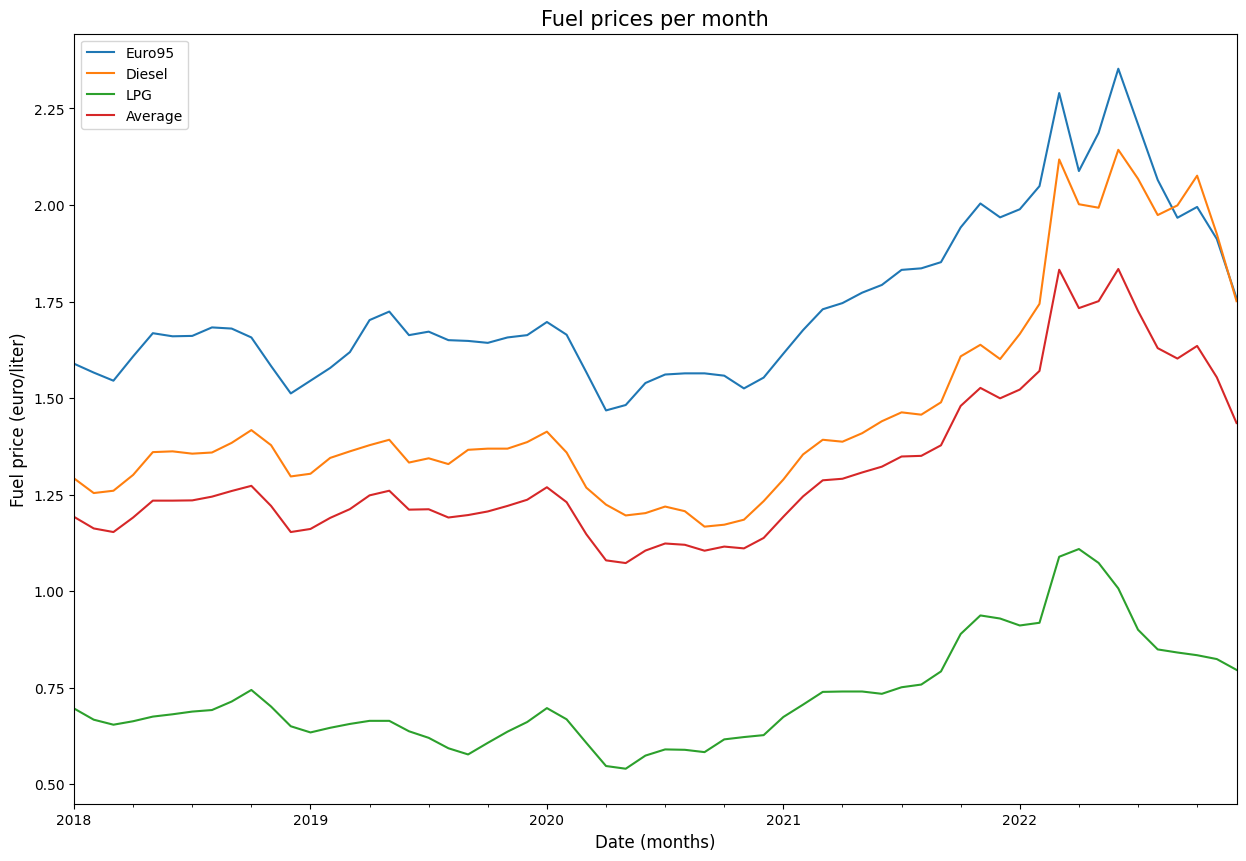

In [22]:
data.plot(figsize=(15,10))
plt.ylabel('Fuel price (euro/liter)', fontsize=12)
plt.xlabel('Date (months)', fontsize=12)
plt.title('Fuel prices per month', fontsize=15)

In [123]:

data_yearly = data.resample('Y').mean() #Takes monthly data and converts into yearly average
data_yearly.reset_index(level=0, inplace=True) #Resets monthly column to level 0
data_yearly['Months'] = data_yearly['Months'].dt.year #Changes date formatt
data_yearly = data_yearly.rename(columns={'Months': 'Year'}) #Change column name from month to Year
data_yearly.set_index("Year", inplace=True) # Make Year column index
data_yearly['Average'] = data_yearly.mean(axis=1) #Caculate yearly average of all fuel types

data_yearly

,Euro95,Diesel,LPG,Average
Year,,,,
2018,1.617667,1.335000,0.685417,1.212694
2019,1.647000,1.356417,0.632917,1.212111
2020,1.561833,1.237083,0.605000,1.134639
2021,1.813917,1.460583,0.782417,1.352306
2022,2.071917,1.954917,0.929250,1.652028


In [55]:
mobility_trips = read_csv('mobility_perday.csv', index_col = 1, skiprows = 6, delimiter = ';', usecols = [0,1,2,3,4,5,6])
mobility_trips = mobility_trips.dropna()
mobility_trips = mobility_trips.drop('Travel modes')
mobility_trips = mobility_trips.rename({'Unnamed: 0':'motive'}, axis=1)
# display(mobility_trips)

group_periods = mobility_trips.groupby('Periods')
display(group_periods)

In [121]:
mobility_dist = read_csv('mobility_perday.csv', index_col = 1, skiprows = 6, delimiter = ';', usecols = [0,1,7,8,9,10,11])
mobility_dist = mobility_dist.dropna()
mobility_dist = mobility_dist.drop('Travel modes')
mobility_dist = mobility_dist.rename({'Unnamed: 0':'motive', '2018.1':'2018',  '2019.1':'2019', '2020.1':'2020', '2021.1':'2021', '2022.1':'2022'}, axis=1)
display(mobility_dist)

,motive,2018,2019,2020,2021,2022
Periods,,,,,,
Total,Total,36.16,36.00,24.88,27.24,30.21
Passenger car (driver),Total,18.16,18.02,13.14,14.05,15.13
Train,Total,3.88,4.08,1.60,1.67,2.62
Bike,Total,3.16,3.01,2.61,2.68,3.04
Walking,Total,0.90,0.88,1.12,1.38,1.21
Total,"Travel to/from work, (non)-daily commute",10.55,9.72,6.16,6.13,7.40
Passenger car (driver),"Travel to/from work, (non)-daily commute",6.79,6.20,4.37,4.33,4.90
Train,"Travel to/from work, (non)-daily commute",1.33,1.35,0.50,0.36,0.71
Bike,"Travel to/from work, (non)-daily commute",0.68,0.65,0.44,0.45,0.55
